In [9]:
import pandas as pd
import sys
# Req for package
sys.path.append("../")
from SkinLearning.NN.Helpers import train, test, DEVICE, get_parameter_loss, set_seed, kfcv
from SkinLearning.NN.Models import MultiTemporal
from SkinLearning.Utils.Dataset import get_dataset, get_split
from SkinLearning.Utils.Plotting import plot_parameter_bars, print_curves
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Results/KFCV/CNN_Temp.csv")

In [4]:
display(df)

,Unnamed: 0,Architecture,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,runs
0,0,"RNN, Single FC, Final Output",4.789774,16.102581,0.226659,0.249721,21.842530,8.157157,8.561403,0.050310,0
1,1,"GRU, Single FC, Final Hidden",2.970484,13.709017,0.145719,0.174728,10.855662,4.311267,5.361147,0.034965,0
2,2,"LSTM, Multi FC, Final Output",3.595735,10.772459,0.174093,0.140132,10.360636,5.192973,5.039338,0.034926,0
3,0,"RNN, Single FC, Final Output",3.718994,10.958085,0.185680,0.162704,16.108633,6.534859,6.278159,0.037007,1
4,1,"GRU, Single FC, Final Hidden",2.475453,9.263675,0.125027,0.123971,9.042543,3.598881,4.104925,0.026599,1
5,2,"LSTM, Multi FC, Final Output",2.521491,9.270358,0.136649,0.124275,9.348806,4.510238,4.318636,0.028109,1
6,0,"RNN, Single FC, Final Output",3.124371,11.176588,0.160569,0.152586,14.135104,6.466357,5.869262,0.034176,2
7,1,"GRU, Single FC, Final Hidden",2.370281,9.354948,0.114332,0.102689,9.330448,3.145800,4.069749,0.023920,2
8,2,"LSTM, Multi FC, Final Output",2.425916,9.518193,0.116949,0.125682,8.942152,4.471201,4.266682,0.028047,2
9,0,"RNN, Single FC, Final Output",2.836125,9.497561,0.139560,0.139781,16.121042,5.551889,5.714326,0.030103,3


In [16]:
means

,Unnamed: 0,YM (Skin),YM (Adipose),PR (Skin),PR (Adipose),Perm (Skin),Perm (Adipose),Overall MAPE,Overall MAE,runs
Architecture,,,,,,,,,,
"GRU, Single FC, Final Hidden",1.0,1.986946,8.571995,0.096999,0.100593,7.709288,3.229962,3.615964,0.021993,4.5
"LSTM, Multi FC, Final Output",2.0,1.895228,7.629513,0.093886,0.094792,7.403741,3.730776,3.474656,0.021603,4.5
"RNN, Single FC, Final Output",0.0,2.718686,9.407326,0.135766,0.128596,13.129205,5.182162,5.116957,0.028615,4.5


(0.0, 14.0)

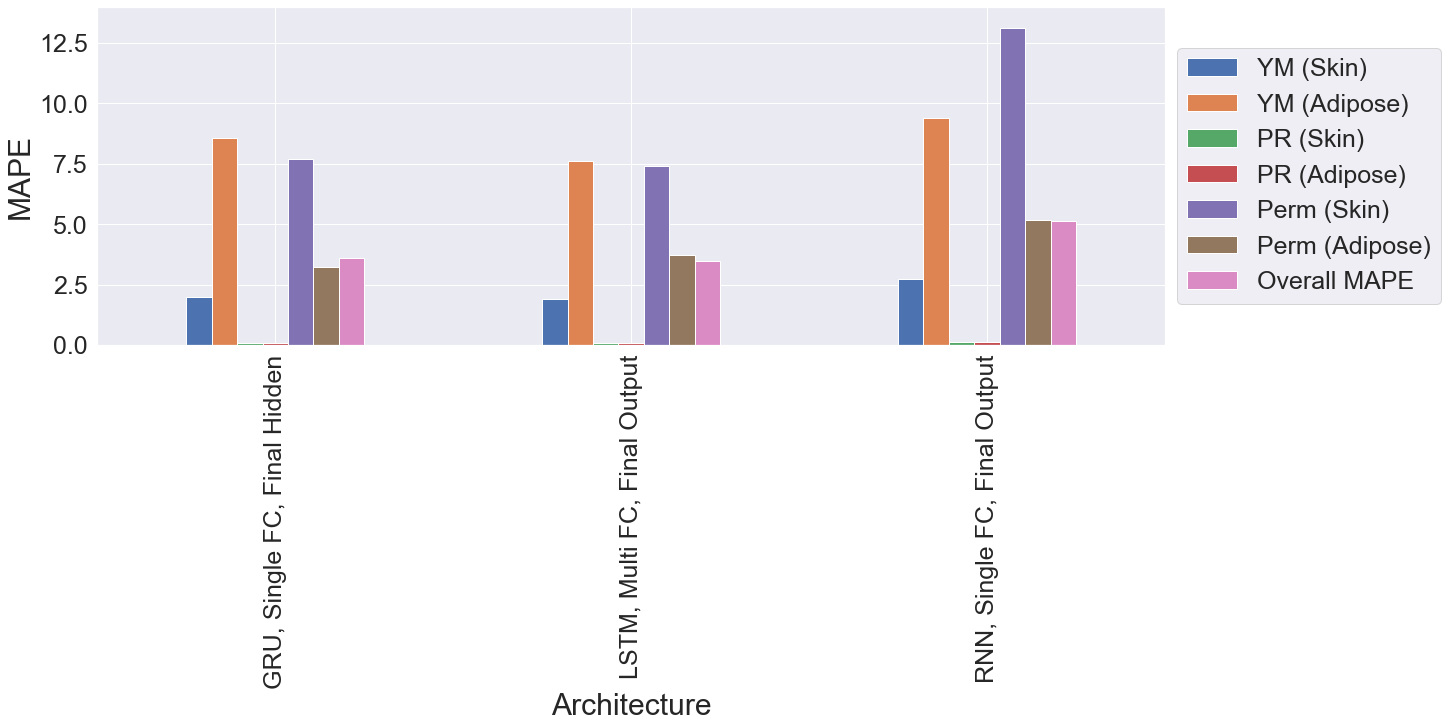

In [21]:
import seaborn as sns
sns.set_theme()
means = df.groupby("Architecture").mean().drop(columns=['Unnamed: 0', 'runs', 'Overall MAE'])
fig, ax = plt.subplots(1, 1, figsize=(20, 10), constrained_layout=True)
means.plot.bar(ax=ax)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.set_ylabel("MAPE", fontsize=30)
ax.set_xlabel("Architecture", fontsize=30)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 25})
ax.set_ylim(0, 14)


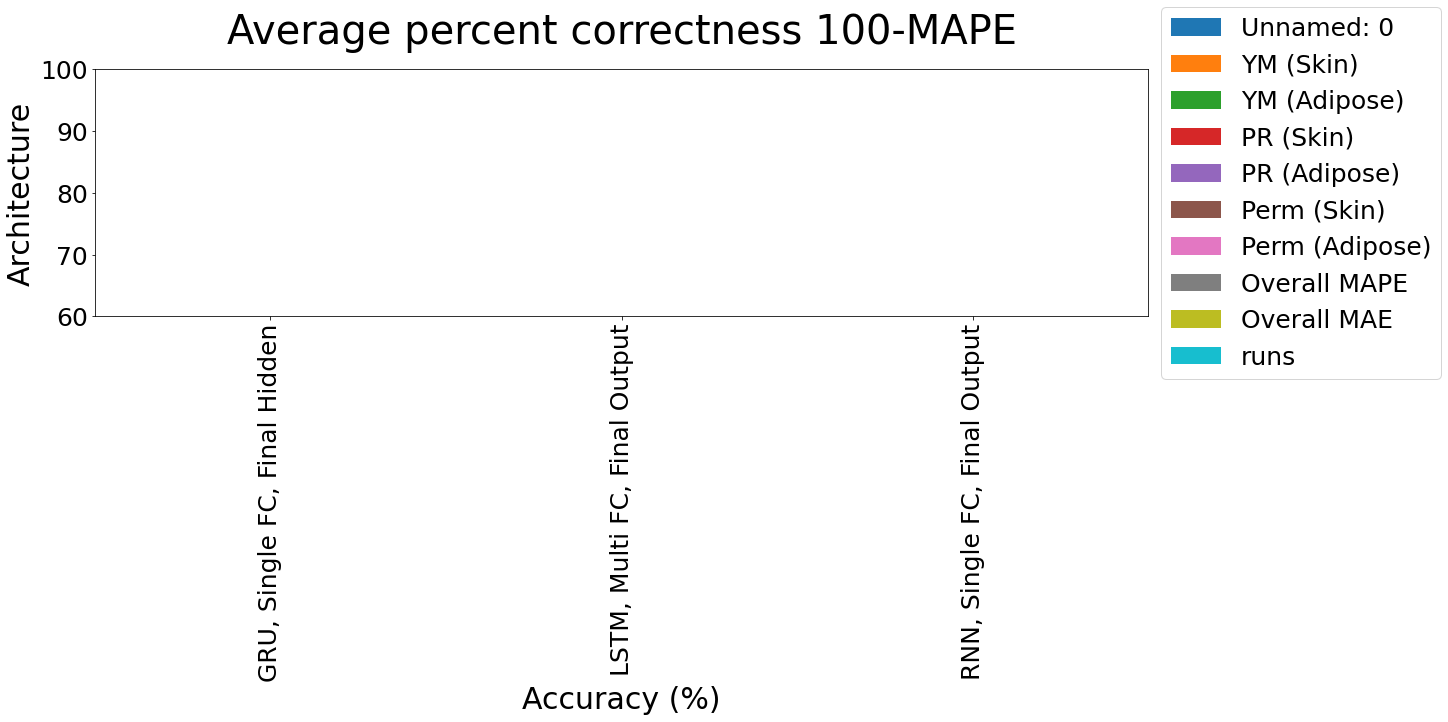

In [12]:
plot_parameter_bars(means)